### Titanic ML using Tensorflow 

In [3]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
#!pip install tensorflow

In [8]:
# load data and arrange into Pandas dataframe, cleaning and pre-processing
import numpy as np
df = read_csv("train.csv")
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

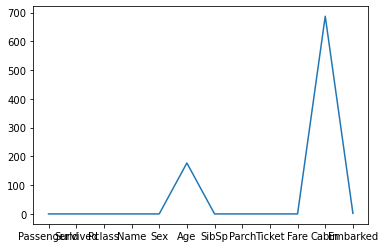

In [9]:
plt.plot(df.isna().sum())

In [10]:
df.head(-20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [11]:

df=df.replace({'Sex': {'male': 0,'female':1} })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [12]:
import pandas as pd
from sklearn import preprocessing, model_selection as ms
from sklearn.preprocessing import minmax_scale
X_train, X_test, y_train, y_test = ms.train_test_split(df.drop(['PassengerId',"Name",'Ticket',"Cabin","Embarked","Age"], axis=1), df['Survived'], test_size = 0.20,random_state = 2)

X_train

,Survived,Pclass,Sex,SibSp,Parch,Fare
30,0,1,0,0,0,27.7208
10,1,3,1,1,1,16.7000
873,0,3,0,0,0,9.0000
182,0,3,0,4,2,31.3875
876,0,3,0,0,0,9.8458
...,...,...,...,...,...,...
534,0,3,1,0,0,8.6625
584,0,3,0,0,0,8.7125
493,0,1,0,0,0,49.5042
527,0,1,0,0,0,221.7792


In [17]:
# Scaling the data by
# Standardizing the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic regression model (Benchmark model)

In [26]:
################################################
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
############################################
#Predict on test data
y_pred_log = log_model.predict(X_test_scaled)
print("Predicted values are: ", y_pred_log)
print("Real values are: ", y_test)
##############################################

Predicted values are:  [1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]
Real values are:  707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64


In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[100,   0],
       [  0,  79]], dtype=int64)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

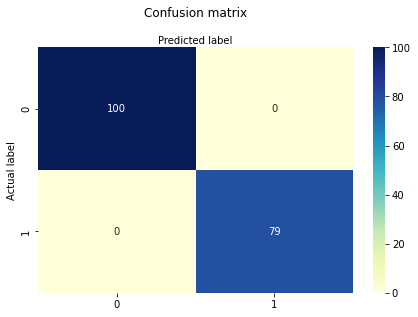

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Data Processing

In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [77]:
df = pd.read_csv("train.csv")
# check for missing values - train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
# first, delete the cabin column (because over 80 percent are missing)
df.drop(['Cabin'], axis=1, inplace=True)

# now impute the 'Age' column (filling the missing data in column Age)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# now ditch the two rows from 'Embarked'
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [79]:
# drop unncessary columns from train and testdf
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# recode the sex column
df['Sex'].replace(('male', 'female'), (0, 1), inplace=True)

# recode the embarked column
df['Embarked'].replace(('Q', 'S', 'C'), (0, 1, 2), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [80]:
# check distribution of target variable
df['Survived'].value_counts()

## 0    549
## 1    340

# our model should at least better than a dummy model
#(549/(549+340)) 

0    549
1    340
Name: Survived, dtype: int64

In [81]:
# split into X and Y
Y = df['Survived']
X = df.drop(['Survived'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)


(889, 7)
(889,)


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X)


## Building a neural network model

In [89]:
# building a neural network model
model = Sequential()
model.add(Dense(50, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=1000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 50)                400       
                                                                 
 dense_22 (Dense)            (None, 30)                1530      
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
72/72 [==============================] - 1s 7ms/step - loss: 0.6319 - accuracy: 0.6456 - val_loss: 0.5900 - val_accuracy: 0.7191
Epoch 2/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.6165 - accuracy: 0.6793 - val_loss: 0.5467 - val_accuracy: 0.7191
Epoch 3/1000
72/72 [============

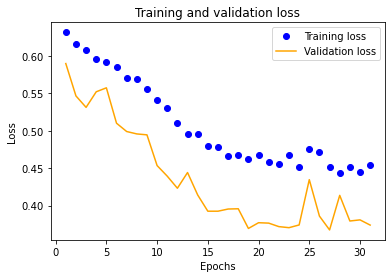

In [90]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

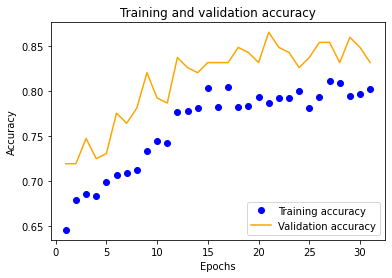

In [91]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)
# confusion matrix
print(confusion_matrix(Y, preds)) # order matters! (actual, predicted)

[[504  45]
 [116 224]]


In [93]:
print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       549
           1       0.83      0.66      0.74       340

    accuracy                           0.82       889
   macro avg       0.82      0.79      0.80       889
weighted avg       0.82      0.82      0.81       889

